In [ ]:
# “what sorts of people were more likely to survive?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")

In [3]:
test= pd.read_csv("test.csv")

In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# BASE MODEL- 

In [7]:
solution=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":0})

In [8]:
# Export the DataFrame to csv in system

solution.to_csv("BASEMODEL.csv",index=False)

In [9]:
cd

C:\Users\ASUS


In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
train.select_dtypes(include="number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

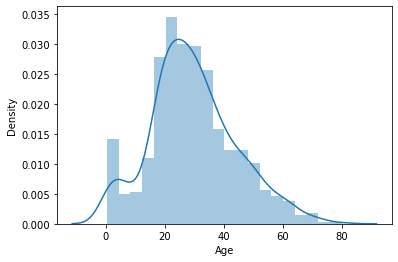

In [12]:
sns.distplot(train["Age"])

In [13]:
train.Age.isnull().sum()

177

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

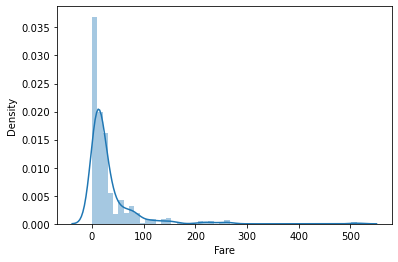

In [14]:
sns.distplot(train.Fare)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

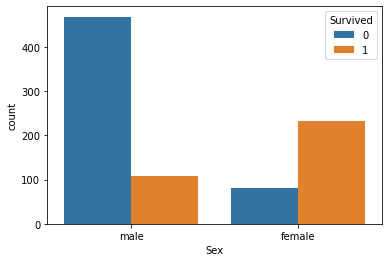

In [15]:
sns.countplot(train.Sex,hue=train.Survived)

# Since we see that female have better chance of survival 
therfore,the next submission will have females as 1 and rest as 0

In [16]:
test.loc[test.Sex=="female","Survived"]=1

In [17]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN


In [18]:
test.fillna(0,inplace=True)

In [19]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1.0


In [20]:
test["Survived"]= test.Survived.astype(int)


In [22]:
test.Survived.isnull().sum()

0

In [21]:
test.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1


In [23]:
solution=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":test.Survived})

In [25]:
solution.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [26]:
solution.to_csv('model 2.csv',index=False)

In [43]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

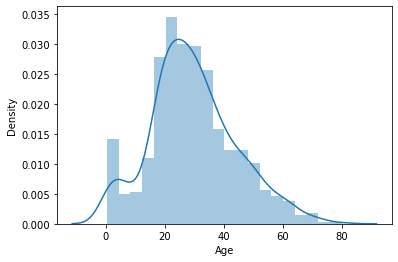

In [47]:
sns.distplot(train.Age)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

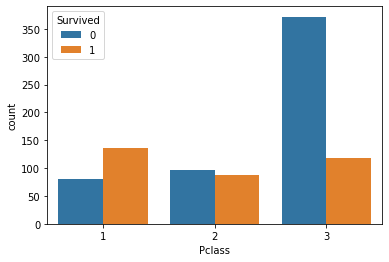

In [42]:
sns.countplot(train.Pclass,hue=train.Survived)

+


In [52]:
 # Feature Engineering....
    
train.Name[456].split(", ")[1].split(".")[0]

'Mr'

In [54]:
titles=[]
for i in train.Name:
    titles.append(i.split(", ")[1].split(".")[0])

In [57]:
pd.Series(titles).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [58]:
titles_ignore=['Don', 'Rev', 'Dr', 'Mme','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [59]:
def ignore(x):
    if x in titles_ignore:
        return("Other")
    else:
        return(x)

In [60]:
train["titles"]=pd.Series(titles)

In [61]:
train["titles"]=train["titles"].apply(ignore)

In [62]:
train["titles"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Ms'], dtype=object)

In [63]:
train.groupby("titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.0,63.0
Mr,398.0,32.368090,12.708793,11.00,23.000,30.0,39.0,80.0
Mrs,108.0,35.898148,11.433628,14.00,27.750,35.0,44.0,63.0
Ms,1.0,28.000000,NaN,28.00,28.000,28.0,28.0,28.0
Other,25.0,42.960000,13.135448,23.00,32.000,45.0,52.0,70.0


In [64]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [65]:
cabins=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148']

In [66]:
def cab(x):
    if x in cabins:
        return("Alotted")
    else:
        return("Not Alotted")

In [69]:
train["cabin_cat"]=train.Cabin.apply(cab)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles,cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Not Alotted
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Alotted
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Not Alotted
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Alotted
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Not Alotted


In [71]:
newtrain=train.drop("Cabin",axis=1)

In [72]:
newtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles,cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Not Alotted
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Alotted
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Not Alotted
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Alotted
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Not Alotted


In [84]:
newtrain["Family"]=newtrain.SibSp+newtrain.Parch+1

In [85]:
newtrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
titles           0
cabin_cat        0
Family           0
dtype: int64

In [88]:
newtrain.loc[newtrain.titles=="Mr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles,cabin_cat,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Not Alotted,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Not Alotted,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr,Not Alotted,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,Alotted,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr,Not Alotted,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,Mr,Not Alotted,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,Mr,Not Alotted,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr,Not Alotted,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,Alotted,1


In [89]:
newtrain.Embarked.fillna("S",inplace=True)

In [90]:
newtrain.groupby("titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.0,63.0
Mr,398.0,32.368090,12.708793,11.00,23.000,30.0,39.0,80.0
Mrs,108.0,35.898148,11.433628,14.00,27.750,35.0,44.0,63.0
Ms,1.0,28.000000,NaN,28.00,28.000,28.0,28.0,28.0
Other,25.0,42.960000,13.135448,23.00,32.000,45.0,52.0,70.0


In [93]:
newtrain.loc[(newtrain.titles=="Other")&(newtrain.Age.isnull()),"Age"]=45

In [94]:
newtrain.loc[(newtrain.titles=="Ms")&(newtrain.Age.isnull()),"Age"]=28

In [95]:
newtrain.loc[(newtrain.titles=="Mrs")&(newtrain.Age.isnull()),"Age"]=35

In [96]:
newtrain.loc[(newtrain.titles=="Mr")&(newtrain.Age.isnull()),"Age"]=30

In [97]:
newtrain.loc[(newtrain.titles=="Miss")&(newtrain.Age.isnull()),"Age"]=21

In [98]:
newtrain.loc[(newtrain.titles=="Master")&(newtrain.Age.isnull()),"Age"]=3.5

In [100]:
newtrain.Age.isnull().sum()

0

# FAMILY GROUP BASIS TICKET

In [101]:
def fam(x):
    if x>2:
        return("Large")
    elif x==2:
        return("Couples")
    else:
        return("Singles")

In [102]:
newtrain["Family_cat"]=newtrain.Family.apply(fam)

In [103]:
newtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles,cabin_cat,Family,Family_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Not Alotted,2,Couples
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Alotted,2,Couples
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Not Alotted,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Alotted,2,Couples
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Not Alotted,1,Singles


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


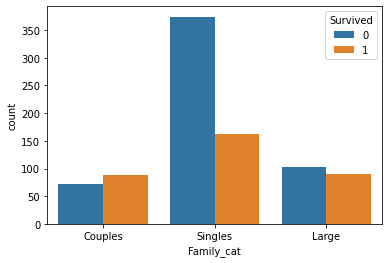

In [105]:
sns.countplot(newtrain.Family_cat,hue=newtrain.Survived)
plt.show()

In [106]:
newtrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles,cabin_cat,Family,Family_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Not Alotted,2,Couples
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Alotted,2,Couples
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Not Alotted,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Alotted,2,Couples
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Not Alotted,1,Singles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other,Not Alotted,1,Singles
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,Alotted,1,Singles
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,Miss,Not Alotted,4,Large
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,Alotted,1,Singles


In [109]:
finaltrain=newtrain.drop(["PassengerId","SibSp","Parch","Ticket","Name"],axis=1)

In [110]:
finaltrain

,Survived,Pclass,Sex,Age,Fare,Embarked,titles,cabin_cat,Family,Family_cat
0,0,3,male,22.0,7.2500,S,Mr,Not Alotted,2,Couples
1,1,1,female,38.0,71.2833,C,Mrs,Alotted,2,Couples
2,1,3,female,26.0,7.9250,S,Miss,Not Alotted,1,Singles
3,1,1,female,35.0,53.1000,S,Mrs,Alotted,2,Couples
4,0,3,male,35.0,8.0500,S,Mr,Not Alotted,1,Singles
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,Not Alotted,1,Singles
887,1,1,female,19.0,30.0000,S,Miss,Alotted,1,Singles
888,0,3,female,21.0,23.4500,S,Miss,Not Alotted,4,Large
889,1,1,male,26.0,30.0000,C,Mr,Alotted,1,Singles


# MODELLING

In [113]:
dummy=pd.get_dummies(finaltrain,drop_first= True)

In [114]:
dummy

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Other,cabin_cat_Not Alotted,Family_cat_Large,Family_cat_Singles
0,0,3,22.0,7.2500,2,1,0,1,0,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,2,0,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,1,1,0,0,0,0,1,0,1
3,1,1,35.0,53.1000,2,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,8.0500,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0,1,0,0,0,0,1,1,0,1
887,1,1,19.0,30.0000,1,0,0,1,1,0,0,0,0,0,0,1
888,0,3,21.0,23.4500,4,0,0,1,1,0,0,0,0,1,1,0
889,1,1,26.0,30.0000,1,1,0,0,0,1,0,0,0,0,0,1


In [115]:
from sklearn.model_selection import train_test_split

In [5]:
pd.read_csv("e-shop clothing 2008.csv",sep=";")

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1
